In [1]:
%matplotlib inline

In [2]:
#we need to make the separate donut shapes, sptaial join each donut w/ roads, then union the results

In [3]:
import geopandas as gpd
import pandas as pd

In [66]:
dc_df = gpd.read_file('DC_Isochrone.geojson')

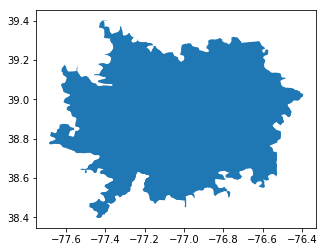

In [87]:
dc_df.plot()

In [43]:
#were creating a duplicate geometry 

dmv_df = gpd.read_file('dmv_traffic/dmv_traffic.shp')
dmv_df['geometry2'] = dmv_df['geometry']

In [44]:
#attempt to reconcile coordinate ref systems

# roads_df.crs = {'init' : 'epsg:4326'}
dc_df.crs = {'init' : 'epsg:4326'}
dmv_df.crs = {'init' : 'epsg:4326'}

In [79]:
#creating our list of donuts
df_small_list = [gpd.overlay(dc_df[dc_df['time'] == 600], dc_df[dc_df['time'] == 300], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 900], dc_df[dc_df['time'] == 600], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 1200], dc_df[dc_df['time'] == 900], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 1500], dc_df[dc_df['time'] == 1200], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 1800], dc_df[dc_df['time'] == 1500], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 2100], dc_df[dc_df['time'] == 1800], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 2400], dc_df[dc_df['time'] == 2100], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 2700], dc_df[dc_df['time'] == 2400], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 3000], dc_df[dc_df['time'] == 2700], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 3300], dc_df[dc_df['time'] == 3000], how='difference'),
                 gpd.overlay(dc_df[dc_df['time'] == 3600], dc_df[dc_df['time'] == 3300], how='difference')
                ]



In [80]:
#adding the donut hole
df_small_list.append(dc_df[dc_df['time'] == 300])

In [81]:
#ideally we'd have size of 1 for all


for i in df_small_list:
    print(len(i))

1
1
1
1
1
1
1
1
1
1
1
1


In [82]:
#concat all the donuts into one df

final_df_test = gpd.GeoDataFrame(pd.concat(df_small_list, ignore_index=True))

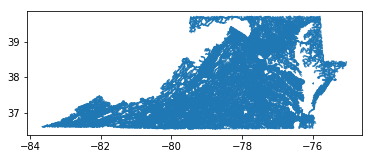

In [19]:
dmv_df['geometry'].plot()

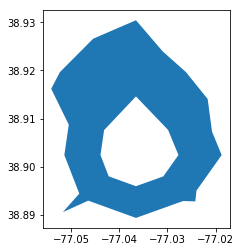

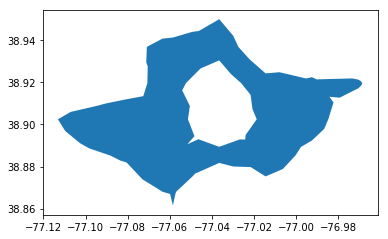

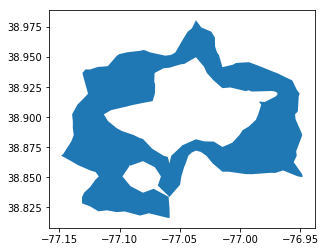

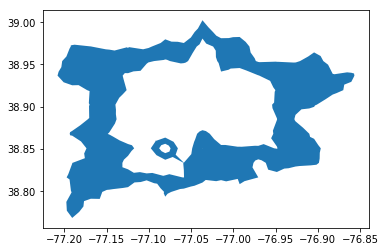

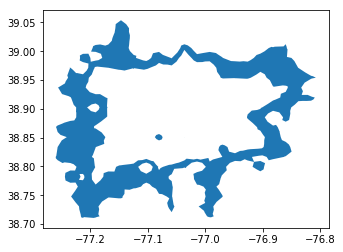

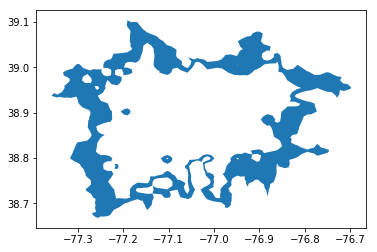

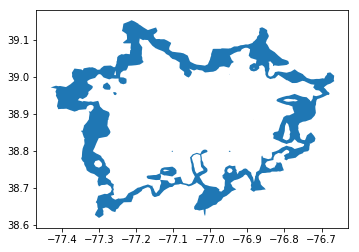

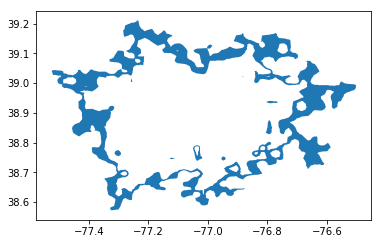

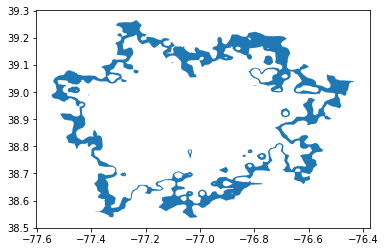

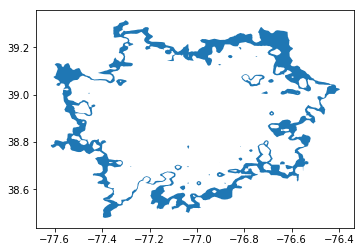

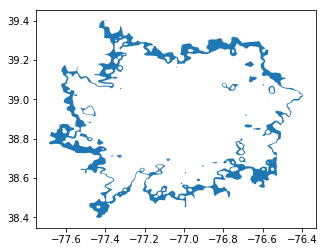

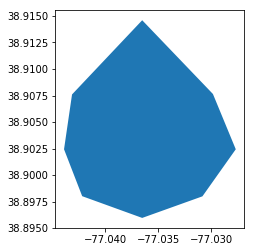

In [86]:
for df in df_small_list:
    df.plot()

In [62]:
#null values can screw up our spatial joins
dmv_df = dmv_df[dmv_df.geometry.notnull()]

In [84]:
#loop through and intersect each donut w/ the dmv streets

df_list2 = []

for df in df_small_list:
    test_join = gpd.sjoin(df, dmv_df, how="inner", op='intersects')
    test_join2 = test_join.drop('geometry', axis=1)
    test_join2 = test_join2.rename(columns={'geometry2' : 'geometry'})
    df_list2.append(test_join2)

In [85]:
#union the data frames and write to file

new_final_df = gpd.GeoDataFrame(pd.concat(df_list2,ignore_index=True))

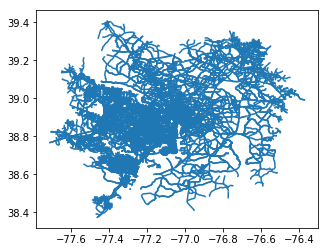

In [88]:
new_final_df.plot()

In [ ]:
new_final_df.to_file('traffic_donuts_dmv')